In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [2]:
data = pd.read_csv(r"Y:\Lior&Einav\Experiments\experiment11_140720\clean_crops_white_paper.csv")
data.head()

,Unnamed: 0,a1-red,a1-yellow,a1069-red,a1069-yellow,a1125-red,a1125-yellow,a1152-red,a1152-yellow,a139-red,...,a535-red,a535-yellow,a35-red,a35-yellow,a291-red,a291-yellow,a171-red,a171-yellow,a142-red,a142-yellow
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
ants = pd.read_csv(r"Y:\Lior&Einav\Experiments\experiment11_140720\ants_list.csv")
ants.head()

,ant_id,is_forager
0,1,False
1,1069,False
2,1125,False
3,1152,False
4,139,False


In [4]:
conversion_factors = pd.read_csv(r"Y:\Lior&Einav\Experiments\experiment11_140720\conversion_factors_by_weight_and_feeding_sum.csv")
conversion_factors

,red,yellow
0,71526.23311,58617.44098


In [5]:
data_dict = {}
for c in ['yellow','red']:
    data_dict[c] = data.filter(regex=".*"+c)/conversion_factors[c][0]
data_dict['red'].head()

,a1-red,a1069-red,a1125-red,a1152-red,a139-red,a150-red,a169-red,a170-red,a173-red,a180-red,...,a137-red,a454-red,a552-red,a424-red,a267-red,a535-red,a35-red,a291-red,a171-red,a142-red
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025476,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050953,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050953,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050953,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
min_col_thres = 0.1 #ul
data_dict_thres = {}
for c in ['yellow','red']:
    data_dict_thres[c] = data_dict[c].where(data_dict[c]>min_col_thres, other=0)


In [7]:
ants.is_forager[0]==False

True

In [8]:
entropy_dict = {}
non_foragers = ants.ant_id[~ants.is_forager]
len(non_foragers)

51

In [9]:
for ant in ants.ant_id:
    reds = data_dict_thres['red']['a'+str(ant)+'-red']
    yellows = data_dict_thres['yellow']['a'+str(ant)+'-yellow']
    reds_norm = reds/(reds+yellows)
    yellows_norm = yellows/(reds+yellows)
    entropy_dict[ant] = entropy([reds_norm,yellows_norm],base=2)
entropy_df = pd.DataFrame.from_dict(entropy_dict)
entropy_df

,1,1069,1125,1152,139,150,169,170,173,180,...,137,454,552,424,267,535,35,291,171,142
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,0.890441,0.966184,0.953637,0.999996,0.935225,0.887396,0.831101,0.293311,0.990243,0.9517,...,0.999957,0.63622,0.959132,0.994863,0.493741,0.910724,0.0,0.999255,0.913929,0.991596
9896,0.890441,0.966184,0.953637,0.999996,0.935225,0.887396,0.831101,0.293311,0.990243,0.9517,...,0.999957,0.63622,0.959132,0.994863,0.493741,0.910724,0.0,0.999255,0.913929,0.991596
9897,0.890441,0.966184,0.953637,0.999996,0.935225,0.887396,0.831101,0.293311,0.990243,0.9517,...,0.999957,0.63622,0.959132,0.994863,0.493741,0.910724,0.0,0.999255,0.913929,0.991596
9898,0.890441,0.966184,0.953637,0.999996,0.935225,0.887396,0.831101,0.293311,0.990243,0.9517,...,0.999957,0.63622,0.959132,0.994863,0.493741,0.910724,0.0,0.999255,0.913929,0.991596


In [10]:
mean_ent = entropy_df.mean(axis=1)
mean_ent

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9895    0.823394
9896    0.823394
9897    0.823394
9898    0.827580
9899    0.827580
Length: 9900, dtype: float64

Text(0, 0.5, 'Entropy (mean)')

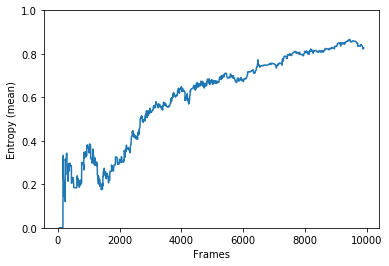

In [11]:
plt.plot(mean_ent)
plt.ylim([0,1])
plt.xlabel('Frames')
plt.ylabel('Entropy (mean)')

C:\Users\liorba\Anaconda3\envs\Experimenting\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


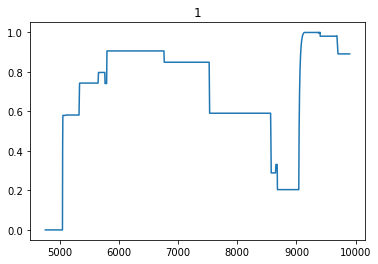

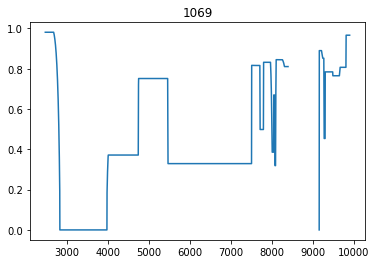

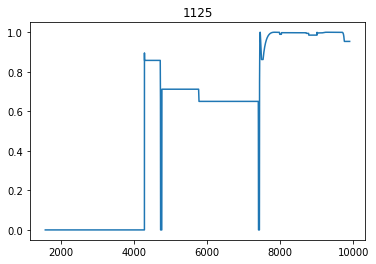

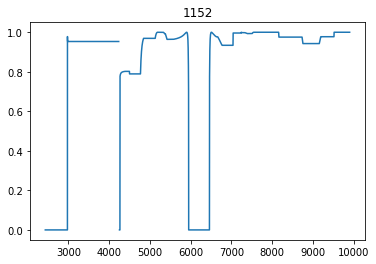

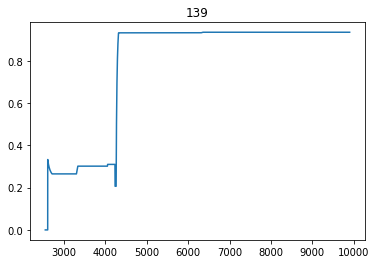

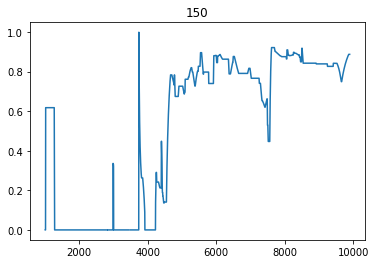

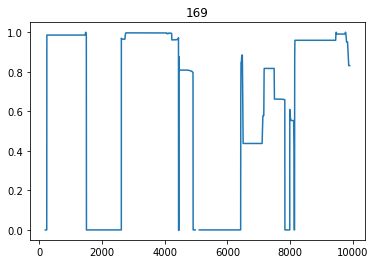

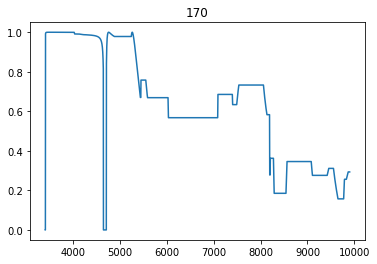

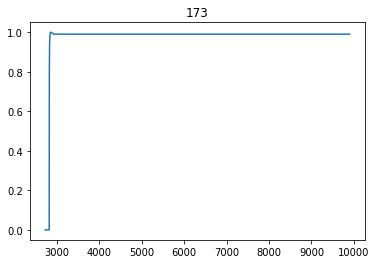

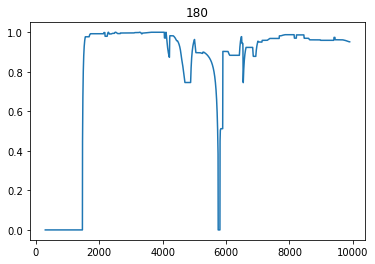

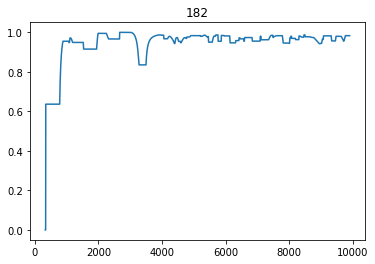

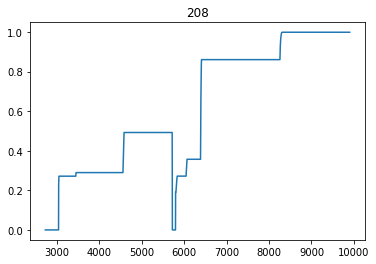

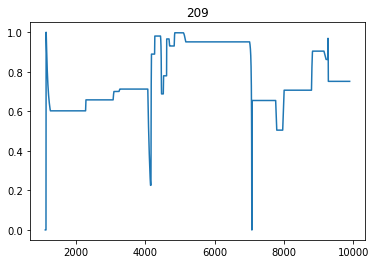

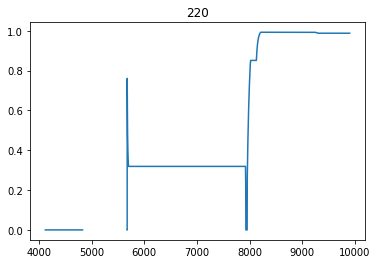

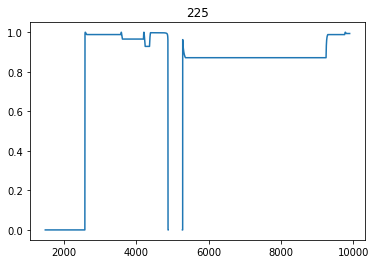

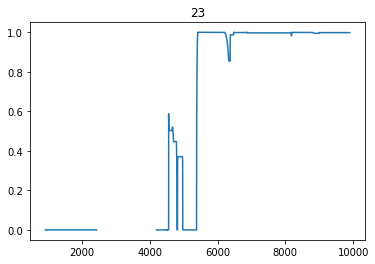

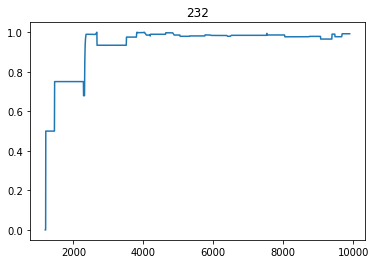

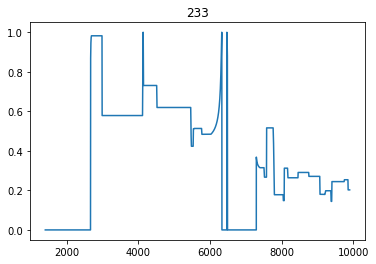

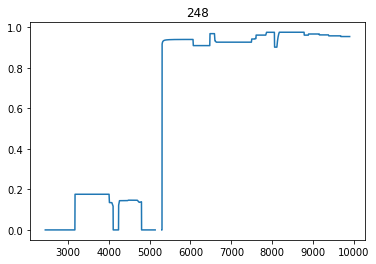

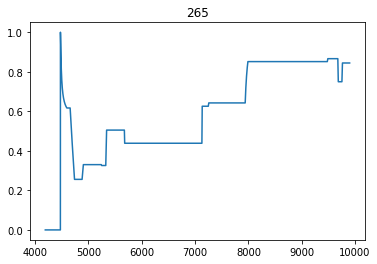

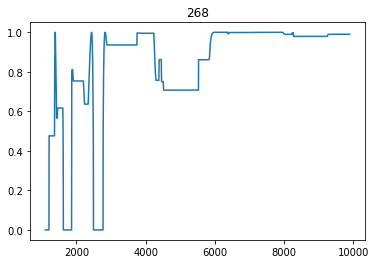

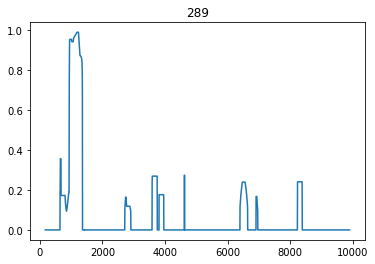

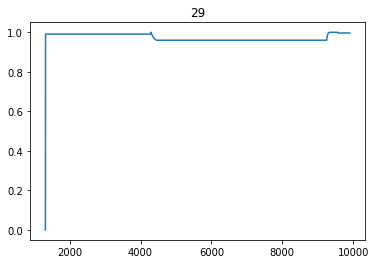

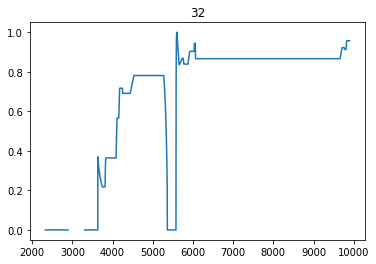

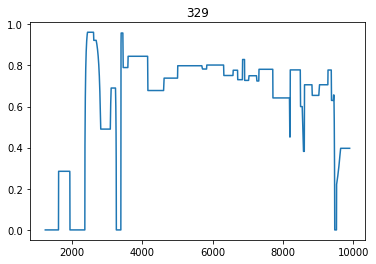

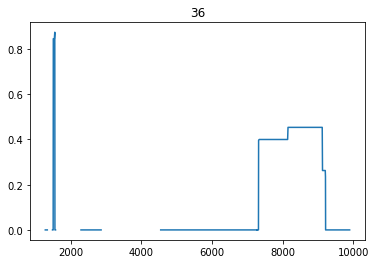

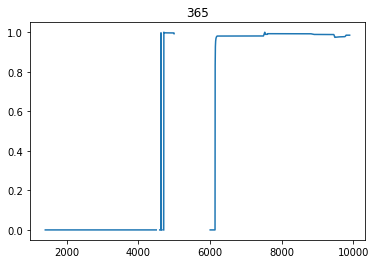

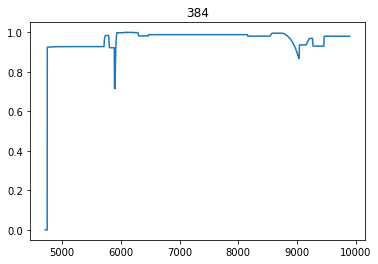

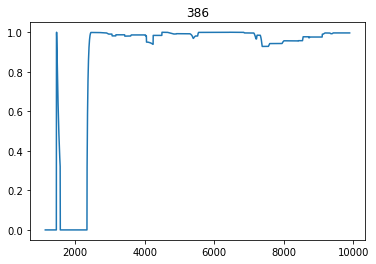

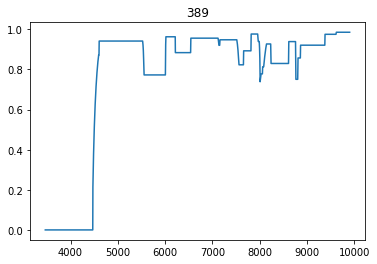

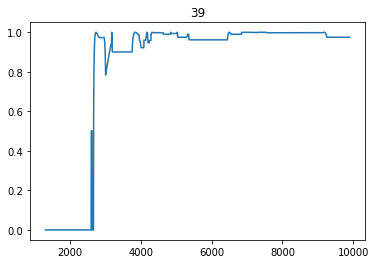

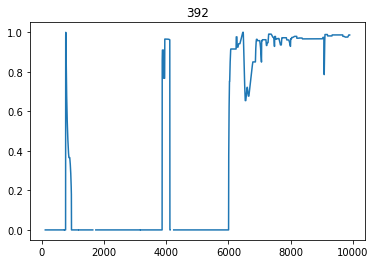

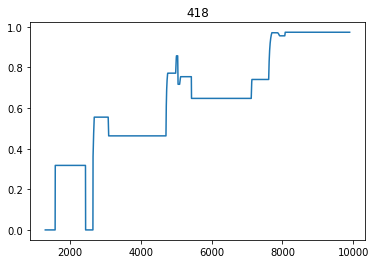

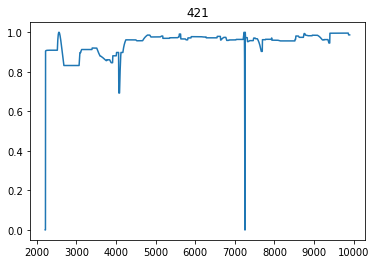

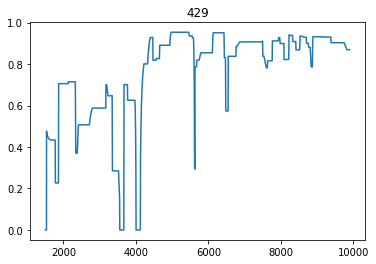

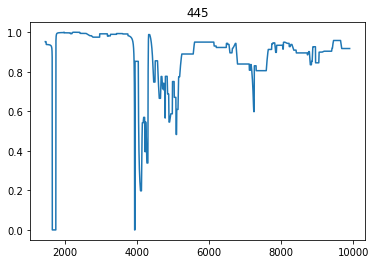

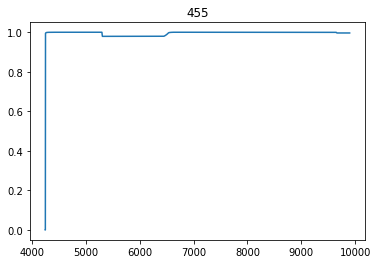

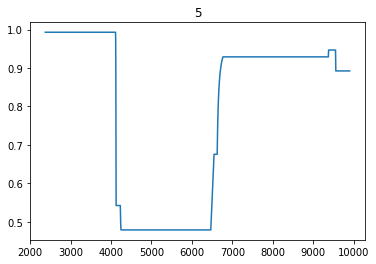

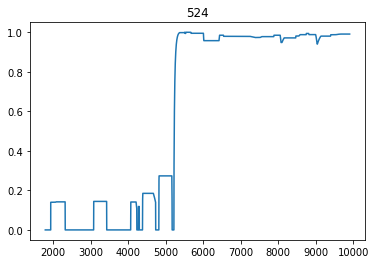

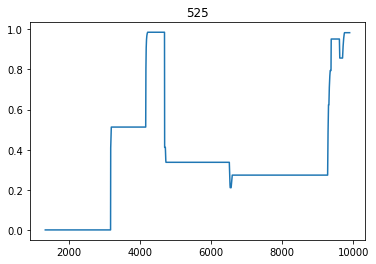

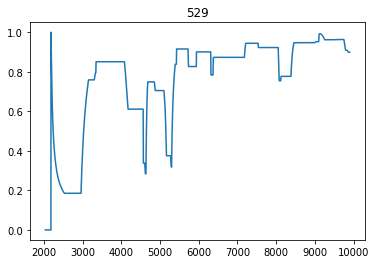

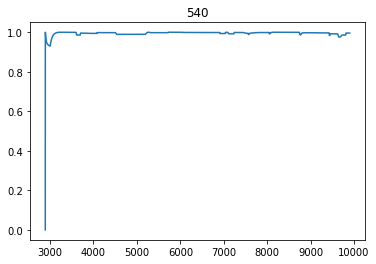

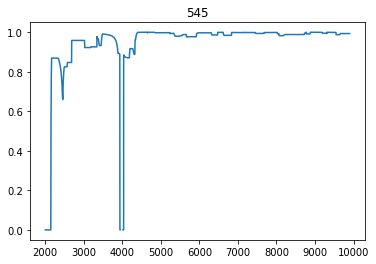

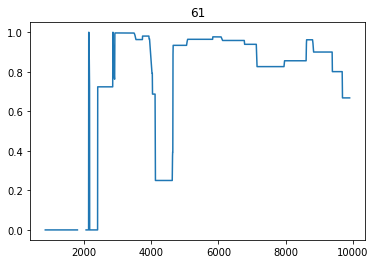

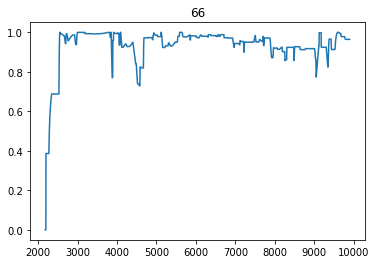

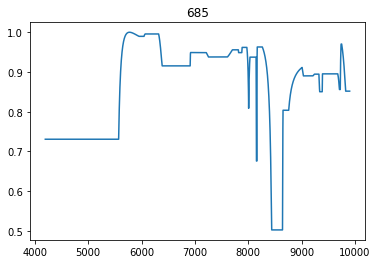

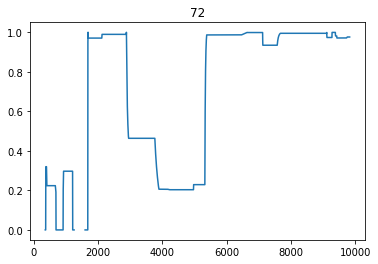

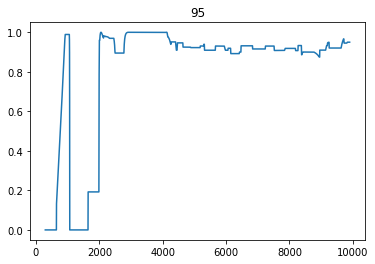

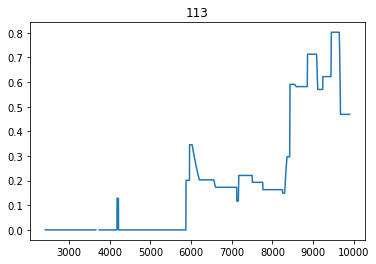

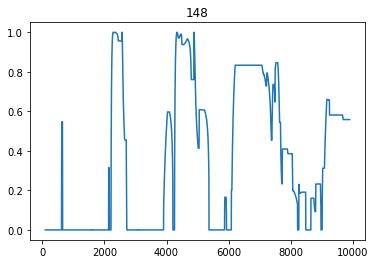

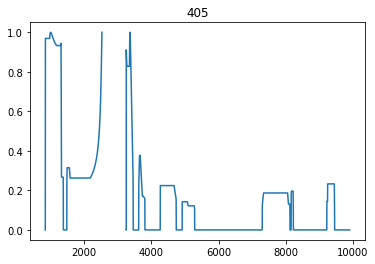

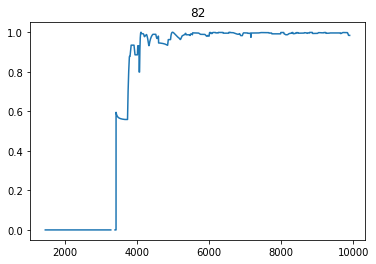

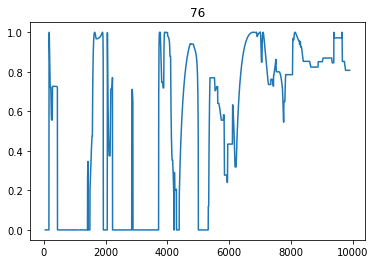

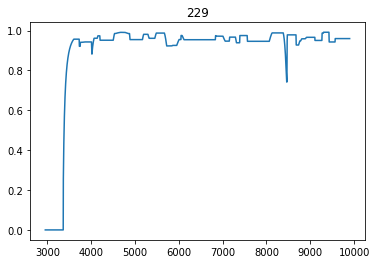

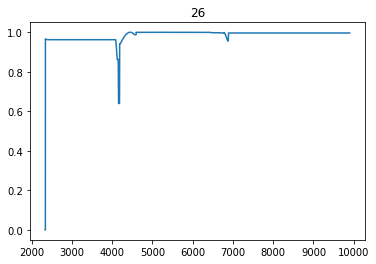

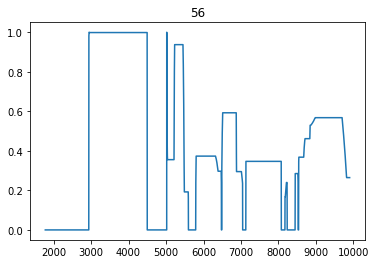

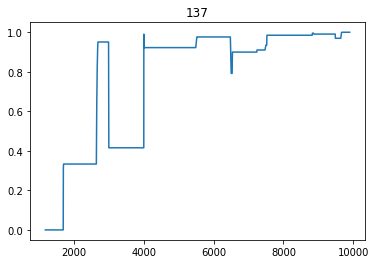

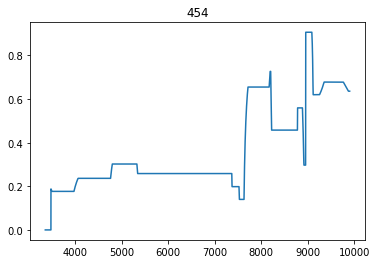

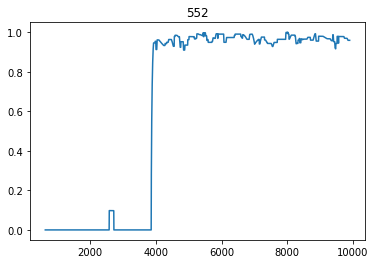

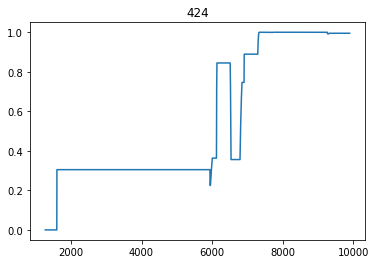

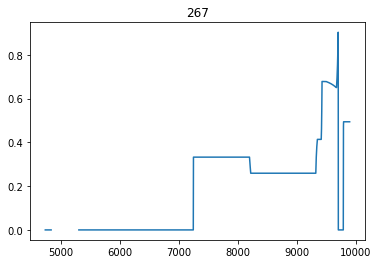

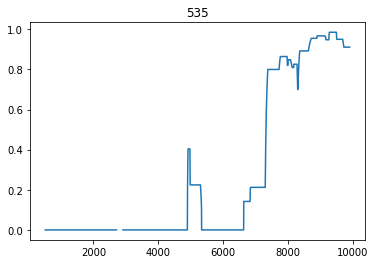

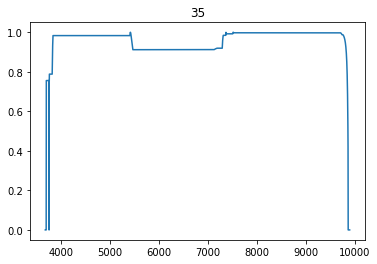

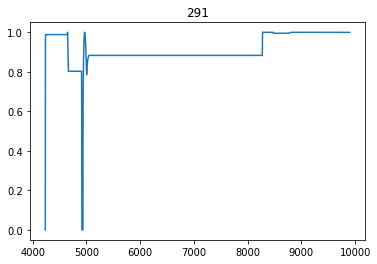

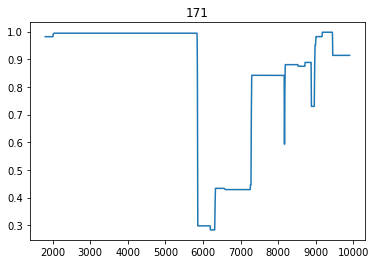

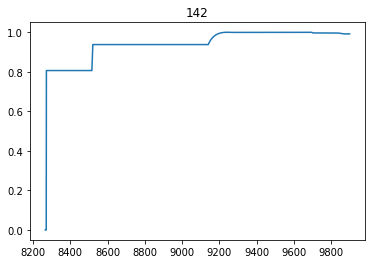

In [17]:
for ant in ants.ant_id:
    plt.figure()
    plt.plot(entropy_df[ant])
    plt.title(ant)

In [13]:
entropy_df.max().max()

0.9999999998598205

In [14]:
entropy([0.5,0.5],base=2)

1.0

Text(0, 0.5, 'Total food ($\\mu l$)')

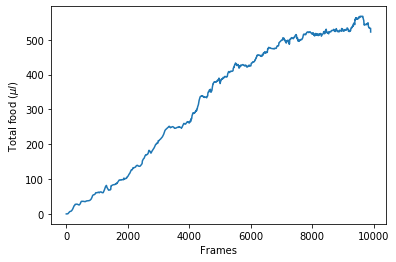

In [15]:
F = data_dict['yellow'].sum(axis=1) + data_dict['red'].sum(axis=1)
plt.figure()
plt.plot(F)
plt.xlabel('Frames')
plt.ylabel(r'Total food ($\mu l$)')

In [21]:
y208 = data_dict_thres['yellow']['a182-yellow']
r208 = data_dict_thres['red']['a182-red']

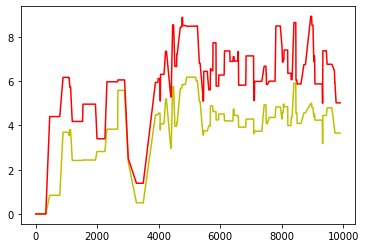

In [22]:
plt.figure
plt.plot(y208,'y')
plt.plot(r208,'r')

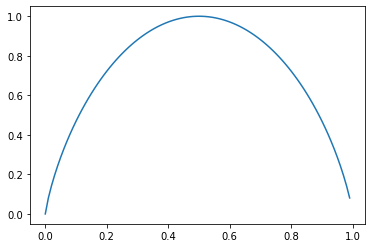

In [36]:
x = np.arange(0,1,0.01)
check_ent = entropy([x,1-x],base=2)
plt.plot(x, check_ent)

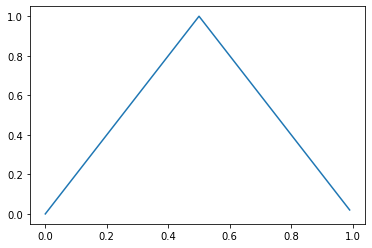

In [37]:
check_frac = 2*(0.5-np.abs(0.5-x))
plt.plot(x, check_frac)

In [38]:
def mixing_frac(p):
    return 2*(0.5-np.abs(0.5-p))

In [41]:
mixing_frac_dict={}
for ant in ants.ant_id:
    reds = data_dict_thres['red']['a'+str(ant)+'-red']
    yellows = data_dict_thres['yellow']['a'+str(ant)+'-yellow']
    reds_norm = reds/(reds+yellows)
    yellows_norm = yellows/(reds+yellows)
    mixing_frac_dict[ant] = mixing_frac(reds_norm)
mixing_frac_df = pd.DataFrame.from_dict(mixing_frac_dict)
mixing_frac_df

,1,1069,1125,1152,139,150,169,170,173,180,...,137,454,552,424,267,535,35,291,171,142
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,0.615298,0.784333,0.747847,0.997604,0.702603,0.610133,0.525813,0.103274,0.883827,0.742693,...,0.992304,0.3216,0.763108,0.915664,0.215926,0.65188,0.0,0.967858,0.658054,0.892168
9896,0.615298,0.784333,0.747847,0.997604,0.702603,0.610133,0.525813,0.103274,0.883827,0.742693,...,0.992304,0.3216,0.763108,0.915664,0.215926,0.65188,0.0,0.967858,0.658054,0.892168
9897,0.615298,0.784333,0.747847,0.997604,0.702603,0.610133,0.525813,0.103274,0.883827,0.742693,...,0.992304,0.3216,0.763108,0.915664,0.215926,0.65188,0.0,0.967858,0.658054,0.892168
9898,0.615298,0.784333,0.747847,0.997604,0.702603,0.610133,0.525813,0.103274,0.883827,0.742693,...,0.992304,0.3216,0.763108,0.915664,0.215926,0.65188,0.0,0.967858,0.658054,0.892168


Text(0, 0.5, 'Mixing level (mean)')

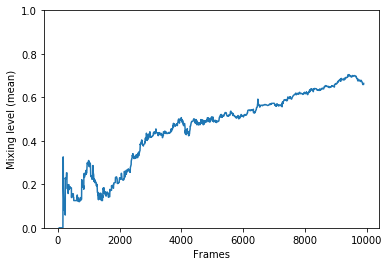

In [42]:
mean_mix = mixing_frac_df.mean(axis=1)
plt.plot(mean_mix)
plt.ylim([0,1])
plt.xlabel('Frames')
plt.ylabel('Mixing level (mean)')

In [5]:

from scipy import ndimage
import numpy as np
a = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0])
b = ndimage.binary_dilation(a,[1,1,1,1])
b

array([False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True])